<a href="https://colab.research.google.com/github/msamunetogetoge/masamune/blob/master/weible_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#データの準備

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install japanize-matplotlib


In [3]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [5]:
df = pd.read_csv("wible_distlibution.csv")
df.head()

,No,t,+
0,1,450,NaN
1,2,460,+
2,3,1150,NaN
3,4,1150,NaN
4,5,1560,+


In [6]:
df.columns = ['No', 't', '+']

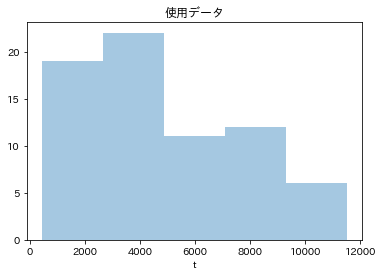

In [7]:
sns.distplot(df['t'],kde=False)
plt.title("使用データ")
plt.savefig("wible_data.png")

# ワイブル分布の当てはめ

In [8]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


In [9]:
def likly_food(x,n,a):
    return -np.sum(np.log(weib(x,n,a)))

In [10]:
lf_n = lambda n:likly_food(x,n,a)
lf_a = lambda a:likly_food(x,n,a)

In [11]:
h=1e-4
n=1
a=0.1
eta=1e-6
x=df["t"]
for i in range(10000):
    LF_old=likly_food(x,n,a)
    grad_n = (lf_n(n+h) - lf_n(n))/h
    grad_a = (lf_a(a+h)-lf_a(a))/h
    a+=eta*grad_n
    n+=eta*grad_a
    LF_new=likly_food(x,n,a)
    if i%50==0 and LF_new>= LF_old :
        print(i)
        print(f"a={a:.4f}")
        print(f"n={n:.4f}")
        break
        
    if i%1000 ==0:
        print(f"LF is {LF_new:.5f}")

print(f"a={a:.4f}")
print(f"n={n:.4f}")

LF is 844.51212
400
a=0.0965
n=1.0113
a=0.0965
n=1.0113


# 解析

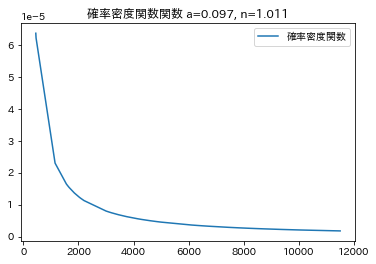

In [12]:
plt.plot(x, weib(x,n,a), label="確率密度関数")
plt.title(f"確率密度関数関数 a={a:.3f}, n={n:.3f}")
plt.legend()
plt.savefig("pdf_weib.png")

In [13]:
def weib_accum(x, n,a):
    return 1-np.exp(-(x/n)**a)

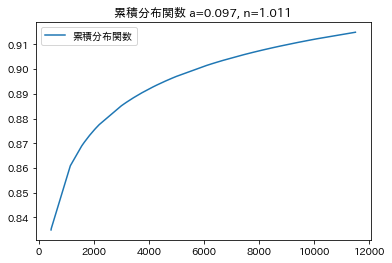

In [14]:
plt.plot(x, weib_accum(x,n,a), label="累積分布関数")
plt.legend()
plt.title(f"累積分布関数 a={a:.3f}, n={n:.3f}")
plt.savefig("cdf_weib.png")

In [15]:
X=np.linspace(1,10000,10000)
for x in X:
    if weib_accum(x,n,a)>0.9:
        print(x)
        break

5711.0


In [16]:
def hazard(x,n,a):
    return (a/n)*x**(a-1)

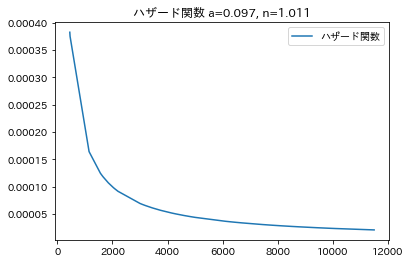

In [21]:
x=df["t"]
plt.plot(x, hazard(x,n,a), label="ハザード関数")
plt.legend()
plt.title(f"ハザード関数 a={a:.3f}, n={n:.3f}")
plt.savefig("hazard_weib.png")